## Final Project Submission

Please fill out:
* Student name: Viktoria Szontagh
* Student pace: full time
* Scheduled project review date/time: Oct 7 2022
* Instructor name: Joseph Mata
* Blog post URL: https://www.blogger.com/blog/posts/8559356684746203802


## Project Overview

This project is about using Exploratory Data Analysis to help Microsoft with some insight of how to enter the into the movie market. During this project, I will analize the genre distribution and profitability, the average length of a movie, the  and how much initial investment needed to create movies in each genre.

### Business Problem

Microsoft decided to create a new movie studio, but they don’t know anything about creating movies. They want to know what types of films are currently doing the best at the box office.  What characteristic  makes the film more likely to be box office hit.
My resposibility is to explor what types of films are currently doing the best at the box office, and make recomendations based on the finding to help them to decide what direction should they take.

Questions
- What genres makes the most in the box office?
- What is the average runtime for the highest grossing genres?
- When is the best time to release a movie to maximalize box office revenue.

### The Data

In [4]:
import pandas as pd
import numpy as np
import csv
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
#data files

gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
info = pd.read_table('zippedData/rt.movie_info.tsv.gz')
reviews = pd.read_table('zippedData/rt.reviews.tsv.gz', encoding = 'unicode_escape')
movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')
budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
im = sqlite3.Connection('zippedData/im.db')

In [6]:
#showing all the tables in the database
imdb_tables = """
SELECT name FROM sqlite_master WHERE type='table'
"""
pd.read_sql(imdb_tables, im)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [7]:
#checking the content of the movie_basics table
basics = ("""
SELECT *
FROM movie_basics;
""")
pd.read_sql(basics, im).head(5)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [8]:
#checking the content of the movie_ratings table
movie_ratings = ("""
SELECT *
FROM movie_ratings;
""")
pd.read_sql(movie_ratings, im).head(5)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [9]:
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### Joining tables

In [10]:
imdb = pd.read_sql("""
SELECT *
FROM movie_basics
JOIN movie_ratings
    USING (movie_id);
""", im)

imdb

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [11]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [12]:
imdb.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

After joining the movie_basics and movie_ratings there are 73856 lines in the combined table.
The runtime_minutes and genres columns has missing information. 
After reviewing the columns with the missing values, I decided to drop the rows containing them,
as they have no added value for the data analysis.


In [13]:
imdb = imdb[imdb['genres'].notna()]

In [14]:
#check if the missing genre is droped
imdb.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7332
genres                0
averagerating         0
numvotes              0
dtype: int64

In [15]:
#checking runtime null values
run_t = imdb[imdb['runtime_minutes'].isna()]
run_t.tail()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
73816,tt9887130,The Human Comedy,The Human Comedy,2019,NaN,Comedy,3.2,17
73828,tt9899290,Band Together with Logic,Band Together with Logic,2019,NaN,Documentary,8.7,10
73830,tt9899850,The Agitation,Ashoftegi,2019,NaN,"Drama,Thriller",4.9,14
73844,tt9905796,July Kaatril,July Kaatril,2019,NaN,Romance,9.0,5
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8


In [16]:
#removing lines with missing runtime_minutes
imdb = imdb[imdb['runtime_minutes'].notna()]


In [17]:
#imdb.head()
#reseting the index of the table
imdb =imdb.reset_index()
#removing unecessary columns
imdb = imdb.drop('index', axis = 1)

imdb

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
4,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
...,...,...,...,...,...,...,...,...
65715,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365
65716,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5
65717,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
65718,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136


In [20]:
#checking the value count of the genre column
imdb['genres'].value_counts().head(15)


Drama                    10189
Documentary               9149
Comedy                    4604
Comedy,Drama              2451
Horror                    2232
Drama,Romance             1392
Thriller                  1288
Comedy,Drama,Romance      1159
Comedy,Romance            1128
Horror,Thriller            943
Drama,Thriller             938
Action                     721
Biography,Documentary      675
Documentary,Drama          572
Documentary,Music          544
Name: genres, dtype: int64

In [21]:
avg_runtime_genre= imdb.groupby('genres')['runtime_minutes'].mean()
avg_runtime_genre.sort_values(ascending= False).round(2)

genres
History,Musical,Romance             174.00
Drama,Fantasy,Musical               171.44
Action,Musical,Romance              170.00
Action,Music                        168.00
Comedy,History                      167.67
                                     ...  
Adventure,Documentary,Reality-TV     49.50
Action,Animation,History             49.00
Adventure,Documentary,Sci-Fi         45.00
Documentary,Music,Reality-TV         37.00
Drama,Short                          18.00
Name: runtime_minutes, Length: 906, dtype: float64

There are multiple lines where the genres had multiple genres for one movie. 
I decided to keep only the most typical one. For example: in the above example, if the genre has 'Comedy, Drama',
I will keep drama, over comedy, same with horror over thriller, drama over comedy and romance.


In [22]:
imdb['genres'][0]

'Action,Crime,Drama'

In [23]:
#replace the multi-value genres, to one single genre

for i in range(len(imdb)):
    if 'Animation' in  imdb['genres'][i]:
        imdb['genres'][i] = 'Animation'
    elif 'Action' in  imdb['genres'][i]:
        imdb['genres'][i] = 'Action'
    elif 'Horror' in  imdb['genres'][i]:
        imdb['genres'][i] = 'Horror'
    elif 'Drama' in  imdb['genres'][i]:
        imdb['genres'][i] = 'Drama'
    elif 'Biography' in  imdb['genres'][i]:
        imdb['genres'][i] = 'Biography'
    elif 'Sport' in  imdb['genres'][i]:
        imdb['genres'][i] = 'Sport'
    if 'Crime' in  imdb['genres'][i]:
        imdb['genres'][i] = 'Crime'
    elif 'Documenary' in  imdb['genres'][i]:
        imdb['genres'][i] = 'Documentary'
    elif 'Sci-Fi' in  imdb['genres'][i]:
        imdb['genres'][i] = 'Sci-Fi'
    elif 'Adventure' in  imdb['genres'][i]:
        imdb['genres'][i] = 'Adventure'
    elif 'Fantasy' in  imdb['genres'][i]:
        imdb['genres'][i] = 'Fantasy'

/var/folders/0k/t_v9n_fd08b6ymg1f7lkdlb40000gn/T/ipykernel_34857/1520861999.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb['genres'][i] = 'Action'
/var/folders/0k/t_v9n_fd08b6ymg1f7lkdlb40000gn/T/ipykernel_34857/1520861999.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb['genres'][i] = 'Drama'
/var/folders/0k/t_v9n_fd08b6ymg1f7lkdlb40000gn/T/ipykernel_34857/1520861999.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [24]:
imdb['genres'].unique()

array(['Action', 'Drama', 'Animation', 'History', 'Documentary',
       'Documentary,History', 'Sci-Fi', 'Comedy', 'Thriller', 'Horror',
       'Adventure', 'Biography', 'Comedy,Family', 'Crime', 'Fantasy',
       'Comedy,Romance', 'Mystery,Thriller', 'Sport', 'Documentary,Music',
       'Comedy,Music,Romance', 'Romance', 'Mystery', 'Musical',
       'Comedy,Musical,Romance', 'Mystery,Romance', 'Family',
       'Documentary,History,War', 'Western', 'Music', 'Comedy,Thriller',
       'Documentary,War', 'Comedy,Documentary', 'Comedy,Musical',
       'Documentary,Family,News', 'Comedy,Family,Romance',
       'Comedy,Western', 'Comedy,Mystery', 'Comedy,History,War',
       'Romance,Thriller', 'Documentary,Family',
       'Comedy,Documentary,History', 'Comedy,Family,Musical',
       'History,Music', 'Documentary,History,Music', 'Documentary,News',
       'Comedy,Documentary,Music', 'Comedy,Music', 'Family,Musical',
       'Music,Romance', 'Documentary,Family,Music',
       'Mystery,Thriller

In [25]:
for i in range(len(imdb)):
    if 'History' in  imdb['genres'][i]:
        imdb['genres'][i] = 'History'
    elif 'Documentary' in  imdb['genres'][i]:
        imdb['genres'][i] = 'Documentary'
    elif 'Romance' in imdb['genres'][i]:
        imdb['genres'][i] = 'Romance'
    elif 'Musical' in  imdb['genres'][i]:
        imdb['genres'][i] = 'Musical'
    elif 'Thriller' in  imdb['genres'][i]:
        imdb['genres'][i] = 'Thriller'
    elif 'History' in  imdb['genres'][i]:
        imdb['genres'][i] = 'History'

/var/folders/0k/t_v9n_fd08b6ymg1f7lkdlb40000gn/T/ipykernel_34857/1283975483.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb['genres'][i] = 'History'
/var/folders/0k/t_v9n_fd08b6ymg1f7lkdlb40000gn/T/ipykernel_34857/1283975483.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb['genres'][i] = 'Documentary'
/var/folders/0k/t_v9n_fd08b6ymg1f7lkdlb40000gn/T/ipykernel_34857/1283975483.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

In [26]:
imdb['genres'].unique()

array(['Action', 'Drama', 'Animation', 'History', 'Documentary', 'Sci-Fi',
       'Comedy', 'Thriller', 'Horror', 'Adventure', 'Biography',
       'Comedy,Family', 'Crime', 'Fantasy', 'Romance', 'Sport', 'Mystery',
       'Musical', 'Family', 'Western', 'Music', 'Comedy,Western',
       'Comedy,Mystery', 'Comedy,Music', 'Comedy,Family,Music',
       'Family,Mystery', 'War', 'Comedy,War', 'Comedy,Family,Western',
       'News', 'Comedy,Family,Mystery', 'Comedy,News', 'Game-Show',
       'Comedy,Music,War', 'Family,Music', 'Reality-TV',
       'Comedy,Reality-TV', 'Family,Western'], dtype=object)

In [27]:
for i in range(len(imdb)):
    if 'Reality-TV' in imdb['genres'][i]:
        imdb['genres'][i] = 'Reality-TV'
    elif 'Comedy' in  imdb['genres'][i]:
        imdb['genres'][i] = 'Comedy'
    elif 'Family' in  imdb['genres'][i]:
        imdb['genres'][i] = 'Family'

/var/folders/0k/t_v9n_fd08b6ymg1f7lkdlb40000gn/T/ipykernel_34857/2425334020.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb['genres'][i] = 'Comedy'
/var/folders/0k/t_v9n_fd08b6ymg1f7lkdlb40000gn/T/ipykernel_34857/2425334020.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb['genres'][i] = 'Family'
/var/folders/0k/t_v9n_fd08b6ymg1f7lkdlb40000gn/T/ipykernel_34857/2425334020.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [28]:
imdb['genres'].unique()

array(['Action', 'Drama', 'Animation', 'History', 'Documentary', 'Sci-Fi',
       'Comedy', 'Thriller', 'Horror', 'Adventure', 'Biography', 'Crime',
       'Fantasy', 'Romance', 'Sport', 'Mystery', 'Musical', 'Family',
       'Western', 'Music', 'War', 'News', 'Game-Show', 'Reality-TV'],
      dtype=object)

In [29]:
imdb['genres'].value_counts()

Drama          25066
Documentary    10514
Horror          6323
Action          5982
Comedy          4900
Biography       2259
Romance         1904
Animation       1615
Thriller        1556
Crime           1049
History          995
Adventure        936
Sci-Fi           639
Sport            575
Family           428
Fantasy          413
Musical          181
Mystery          149
Music            136
Western           64
War               30
Reality-TV         3
News               2
Game-Show          1
Name: genres, dtype: int64

In [30]:
avg_runtime_genre= imdb.groupby('genres')['runtime_minutes'].mean()
avg_runtime_genre.sort_values(ascending= False).round(2)

genres
Game-Show      130.00
Reality-TV     124.67
Romance        105.10
Action         104.71
Music          102.21
Musical        100.72
News            99.50
Drama           97.97
Mystery         97.10
Comedy          96.16
War             95.60
Thriller        95.54
Crime           94.93
Fantasy         94.75
Sci-Fi          90.31
Western         90.05
Family          89.96
Adventure       89.07
Horror          88.45
Documentary     88.16
Sport           85.62
Animation       85.46
History         85.29
Biography       84.70
Name: runtime_minutes, dtype: float64

In [31]:
imdb.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,65720.000000,65720.000000,65720.000000,6.572000e+04
mean,2014.258065,94.732273,6.320902,3.954674e+03
std,2.600143,209.377017,1.458878,3.208823e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.600000e+01
50%,2014.000000,91.000000,6.500000,6.200000e+01
75%,2016.000000,104.000000,7.300000,3.520000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [32]:
imdb['runtime_minutes'].median()

91.0

In [33]:
imdb['runtime_minutes'].mean()

94.7322732805843

It seems runtime_minutes have outliers. 
The highest value is significantly higher then the 75 percentile, with a value of 51420 minutes. This can skew the distribution and cause the mean to shift toward the outlier. On the minimum value side, the value 3 seems significantly lower then the lower quartile of 81 minutes. I will remove outliers below the runtime 10 and above 300 minutes.


In [34]:
#removing outliers line here
#getting the index of all rows where the runtime is over 300 min
not_avg_runtime = imdb[imdb['runtime_minutes'] > 300].index.values
len(not_avg_runtime)

43

In [35]:
#there are still 43 lines where the runtime is more than 300 minutes, I will remove these lines too.
imdb = imdb.drop(index=not_avg_runtime)

In [36]:
#let's check if they are removed
imdb[imdb['runtime_minutes'] > 300]

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes


In [40]:
not_avg_min = imdb[imdb['runtime_minutes'] < 10].index.values
len(not_avg_min)

32

In [41]:
# there are 32 lines that are less then 10 minutes long, I will remove these lines too
imdb = imdb.drop(index=not_avg_min)

In [42]:
#let's check if they are dropped
imdb[imdb['runtime_minutes'] < 10]

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes


In [43]:
imdb.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,65645.000000,65645.000000,65645.000000,6.564500e+04
mean,2014.257887,93.541702,6.319659,3.957762e+03
std,2.600134,22.737964,1.458497,3.210527e+04
min,2010.000000,10.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.600000e+01
50%,2014.000000,91.000000,6.500000,6.200000e+01
75%,2016.000000,104.000000,7.300000,3.530000e+02
max,2019.000000,300.000000,10.000000,1.841066e+06


Now the data set look better after removing the outliers. 

In [44]:
imdb.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,Drama,6.5,119
4,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,Animation,8.1,263


In [45]:
# reseting the index after removing the outliers
imdb =imdb.reset_index()


In [47]:
#removing the two extra column what I got after reseting the indexes.
imdb = imdb.drop('index', axis = 1)

In [48]:
imdb.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,Drama,6.5,119
4,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,Animation,8.1,263


After the 1st table is cleaned, I will merge the imdb table with the budget file.

In [49]:
imdb_all = imdb.merge(budget, left_on = 'original_title', right_on ='movie', suffixes = (False, '_bud'))

In [50]:
imdb_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2527 entries, 0 to 2526
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           2527 non-null   object 
 1   primary_title      2527 non-null   object 
 2   original_title     2527 non-null   object 
 3   start_year         2527 non-null   int64  
 4   runtime_minutes    2527 non-null   float64
 5   genres             2527 non-null   object 
 6   averagerating      2527 non-null   float64
 7   numvotes           2527 non-null   int64  
 8   id                 2527 non-null   int64  
 9   release_date       2527 non-null   object 
 10  movie              2527 non-null   object 
 11  production_budget  2527 non-null   object 
 12  domestic_gross     2527 non-null   object 
 13  worldwide_gross    2527 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 296.1+ KB


In [51]:
imdb_all.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'id',
       'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [52]:
#removing the id column as it is not necessary for my data set
imdb_all = imdb_all.drop(['primary_title', 'start_year','id', 'movie'], axis = 1)

In [53]:
imdb_all.head()

,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,91.0,Animation,1.9,8248,"Dec 31, 2012","$45,000,000",$0,"$73,706"
1,tt0337692,On the Road,124.0,Drama,6.1,37886,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"
2,tt4339118,On the Road,89.0,Drama,6.0,6,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"
3,tt5647250,On the Road,121.0,Drama,5.7,127,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"
4,tt0359950,The Secret Life of Walter Mitty,114.0,Drama,7.3,275300,"Dec 25, 2013","$91,000,000","$58,236,838","$187,861,183"


In [54]:
imdb_all['worldwide_gross'] = imdb_all['worldwide_gross'].apply(lambda x: x.replace('$',''))
imdb_all['worldwide_gross']= imdb_all['worldwide_gross'].apply(lambda x: x.replace(',',''))
imdb_all['worldwide_gross'] = imdb_all['worldwide_gross'].astype(int)
imdb_all['domestic_gross'] = imdb_all['domestic_gross'].apply(lambda x: x.replace('$',''))
imdb_all['domestic_gross'] = imdb_all['domestic_gross'].apply(lambda x: x.replace(',',''))
imdb_all['domestic_gross'] = imdb_all['domestic_gross'].astype(int)
imdb_all['production_budget'] = imdb_all['production_budget'].apply(lambda x: x.replace('$',''))
imdb_all['production_budget'] = imdb_all['production_budget'].apply(lambda x: x.replace(',',''))
imdb_all['production_budget'] = imdb_all['production_budget'].astype(int)

imdb_all['foreign_gross'] = imdb_all['worldwide_gross'] - imdb_all['domestic_gross']
imdb_all.head()

,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,foreign_gross
0,tt0249516,Foodfight!,91.0,Animation,1.9,8248,"Dec 31, 2012",45000000,0,73706,73706
1,tt0337692,On the Road,124.0,Drama,6.1,37886,"Mar 22, 2013",25000000,720828,9313302,8592474
2,tt4339118,On the Road,89.0,Drama,6.0,6,"Mar 22, 2013",25000000,720828,9313302,8592474
3,tt5647250,On the Road,121.0,Drama,5.7,127,"Mar 22, 2013",25000000,720828,9313302,8592474
4,tt0359950,The Secret Life of Walter Mitty,114.0,Drama,7.3,275300,"Dec 25, 2013",91000000,58236838,187861183,129624345


In [55]:
#there are 3 movies with original_title Frozen, the one in 2013 is the  Disney Animation movie
# the one from 2010 is an R Drama, thriller. 
#Because I joined the tables with the movie and original title columns, and they are identical, 
#the budget and gross revenues had been copied to the 2010 version as well. The release data also need to be set to 2010.
#Due to this, I will set these values 0.
frozen_movies = imdb_all[imdb_all['original_title']== 'Frozen']
frozen_movies


,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,foreign_gross
456,tt1323045,Frozen,93.0,Drama,6.2,62311,"Nov 22, 2013",150000000,400738009,1272469910,871731901
457,tt2294629,Frozen,102.0,Animation,7.5,516998,"Nov 22, 2013",150000000,400738009,1272469910,871731901


In [57]:
imdb_all.iloc[456,6] = 'Mar 25, 2010'
imdb_all.iloc[456,8] = 0
imdb_all.iloc[456,9] = 0
imdb_all.iloc[456,10] = 3843774

In [58]:
#checking for duplicate film titles
imdb_all[imdb_all.duplicated(keep=False)].sort_values(by='original_title')


,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,foreign_gross


In [59]:
#Inside Out seems to be a duplicate too
d = imdb_all[imdb_all['original_title'] == "Inside Out"]
d

,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,foreign_gross
897,tt1640486,Inside Out,93.0,Drama,4.6,1566,"Jun 19, 2015",175000000,356461711,854235992,497774281
898,tt2071483,Inside Out,59.0,Family,7.3,15,"Jun 19, 2015",175000000,356461711,854235992,497774281
899,tt2096673,Inside Out,95.0,Animation,8.2,536181,"Jun 19, 2015",175000000,356461711,854235992,497774281
900,tt2608638,Inside Out,75.0,Biography,7.5,60,"Jun 19, 2015",175000000,356461711,854235992,497774281


In [60]:
imdb_all.iloc[897,6] = 'Sep 09, 2011'
imdb_all.iloc[897,8] = 0
imdb_all.iloc[897,9] = 0
imdb_all.iloc[897,10] = 0


In [61]:
#I don't find information about these moveis, so I will remove these lines
imdb_all = imdb_all.drop(index= 898)
imdb_all = imdb_all.drop(index = 900)


In [62]:
# check and keep / remove Venom and Wonder Woman
w = imdb_all[imdb_all['original_title'] == "Wonder Woman"]
w

,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,foreign_gross
26,tt0451279,Wonder Woman,141.0,Action,7.5,487527,"Jun 2, 2017",150000000,412563408,821133378,408569970
27,tt4028068,Wonder Woman,60.0,Sci-Fi,4.2,20,"Jun 2, 2017",150000000,412563408,821133378,408569970
28,tt4283448,Wonder Woman,75.0,Drama,6.9,13,"Jun 2, 2017",150000000,412563408,821133378,408569970


In [63]:
imdb_all = imdb_all.drop(index= 27)

In [64]:
imdb_all = imdb_all.drop(index= 28)

In [66]:
v = imdb_all[imdb_all['original_title'] == "Venom"]
v

,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,foreign_gross
392,tt1270797,Venom,112.0,Action,6.7,275406,"Oct 5, 2018",116000000,213511408,853628605,640117197
393,tt1270797,Venom,112.0,Action,6.7,275406,"Sep 16, 2005",25000000,881745,881745,0
394,tt1931601,Venom,92.0,Thriller,3.0,162,"Oct 5, 2018",116000000,213511408,853628605,640117197
395,tt1931601,Venom,92.0,Thriller,3.0,162,"Sep 16, 2005",25000000,881745,881745,0


In [67]:
imdb_all = imdb_all.drop(index= 393)
v

,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,foreign_gross
392,tt1270797,Venom,112.0,Action,6.7,275406,"Oct 5, 2018",116000000,213511408,853628605,640117197
393,tt1270797,Venom,112.0,Action,6.7,275406,"Sep 16, 2005",25000000,881745,881745,0
394,tt1931601,Venom,92.0,Thriller,3.0,162,"Oct 5, 2018",116000000,213511408,853628605,640117197
395,tt1931601,Venom,92.0,Thriller,3.0,162,"Sep 16, 2005",25000000,881745,881745,0


In [68]:
imdb_all = imdb_all.drop(index= 394)

In [85]:
o = imdb_all[imdb_all['original_title'] == "On the Road"]
o

,index,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,foreign_gross,year,month,profit,profitable
1,1,tt0337692,On the Road,124.0,Drama,6.1,37886,2013-03-22,25000000,720828,9313302,8592474,2013,3,-15686698,0
2,2,tt4339118,On the Road,89.0,Drama,6.0,6,2013-03-22,25000000,720828,9313302,8592474,2013,3,-15686698,0
3,3,tt5647250,On the Road,121.0,Drama,5.7,127,2013-03-22,25000000,720828,9313302,8592474,2013,3,-15686698,0


In [86]:
imdb_all = imdb_all.drop(index= 2)

In [87]:
imdb_all = imdb_all.drop(index= 3)

In [88]:
#check if the values are over written in the original data set. It seems it removed the On the Road movie
imdb_all.iloc[3,] 

index                                          5
movie_id                               tt0365907
original_title       A Walk Among the Tombstones
runtime_minutes                            114.0
genres                                    Action
averagerating                                6.5
numvotes                                  105116
release_date                 2014-09-19 00:00:00
production_budget                       28000000
domestic_gross                          26017685
worldwide_gross                         62108587
foreign_gross                           36090902
year                                        2014
month                                          9
profit                                  34108587
profitable                                     1
Name: 5, dtype: object

In [89]:
# reset index
imdb_all =imdb_all.reset_index()

In [73]:
#changing the datatype of the release date column
imdb_all['release_date'] = pd.to_datetime(imdb_all['release_date'])

In [74]:
imdb_all.head()

,index,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,foreign_gross
0,0,tt0249516,Foodfight!,91.0,Animation,1.9,8248,2012-12-31,45000000,0,73706,73706
1,1,tt0337692,On the Road,124.0,Drama,6.1,37886,2013-03-22,25000000,720828,9313302,8592474
2,2,tt4339118,On the Road,89.0,Drama,6.0,6,2013-03-22,25000000,720828,9313302,8592474
3,3,tt5647250,On the Road,121.0,Drama,5.7,127,2013-03-22,25000000,720828,9313302,8592474
4,4,tt0359950,The Secret Life of Walter Mitty,114.0,Drama,7.3,275300,2013-12-25,91000000,58236838,187861183,129624345


In [75]:
#imdb_all.str.split(path='-', expand = True)

imdb_all['year'] = pd.to_datetime(imdb_all['release_date']).dt.year
imdb_all['month'] = pd.to_datetime(imdb_all['release_date']).dt.month
imdb_all.head()

,index,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,foreign_gross,year,month
0,0,tt0249516,Foodfight!,91.0,Animation,1.9,8248,2012-12-31,45000000,0,73706,73706,2012,12
1,1,tt0337692,On the Road,124.0,Drama,6.1,37886,2013-03-22,25000000,720828,9313302,8592474,2013,3
2,2,tt4339118,On the Road,89.0,Drama,6.0,6,2013-03-22,25000000,720828,9313302,8592474,2013,3
3,3,tt5647250,On the Road,121.0,Drama,5.7,127,2013-03-22,25000000,720828,9313302,8592474,2013,3
4,4,tt0359950,The Secret Life of Walter Mitty,114.0,Drama,7.3,275300,2013-12-25,91000000,58236838,187861183,129624345,2013,12


In [76]:
#adding a new column for profit, and calculating it from worldwide_gross - production_budget
imdb_all['profit'] = imdb_all['worldwide_gross'] - imdb_all['production_budget']


In [90]:
imdb_all.head()

,level_0,index,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,foreign_gross,year,month,profit,profitable
0,0,0,tt0249516,Foodfight!,91.0,Animation,1.9,8248,2012-12-31,45000000,0,73706,73706,2012,12,-44926294,0
1,1,1,tt0337692,On the Road,124.0,Drama,6.1,37886,2013-03-22,25000000,720828,9313302,8592474,2013,3,-15686698,0
2,4,4,tt0359950,The Secret Life of Walter Mitty,114.0,Drama,7.3,275300,2013-12-25,91000000,58236838,187861183,129624345,2013,12,96861183,1
3,5,5,tt0365907,A Walk Among the Tombstones,114.0,Action,6.5,105116,2014-09-19,28000000,26017685,62108587,36090902,2014,9,34108587,1
4,6,6,tt0369610,Jurassic World,124.0,Action,7.0,539338,2015-06-12,215000000,652270625,1648854864,996584239,2015,6,1433854864,1


In [81]:
#creating a profitable column with boolean value of 0 for loss, and 1 for profit
imdb_all['profitable'] = None

In [82]:
for i in range(len(imdb_all)):
    if imdb_all['profit'][i] > 0:
        imdb_all['profitable'][i] = 1
    else:
        imdb_all['profitable'][i] = 0

/var/folders/0k/t_v9n_fd08b6ymg1f7lkdlb40000gn/T/ipykernel_34857/4258084072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_all['profitable'][i] = 0
/var/folders/0k/t_v9n_fd08b6ymg1f7lkdlb40000gn/T/ipykernel_34857/4258084072.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_all['profitable'][i] = 1


In [83]:
imdb_all.head()

,index,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,foreign_gross,year,month,profit,profitable
0,0,tt0249516,Foodfight!,91.0,Animation,1.9,8248,2012-12-31,45000000,0,73706,73706,2012,12,-44926294,0
1,1,tt0337692,On the Road,124.0,Drama,6.1,37886,2013-03-22,25000000,720828,9313302,8592474,2013,3,-15686698,0
2,2,tt4339118,On the Road,89.0,Drama,6.0,6,2013-03-22,25000000,720828,9313302,8592474,2013,3,-15686698,0
3,3,tt5647250,On the Road,121.0,Drama,5.7,127,2013-03-22,25000000,720828,9313302,8592474,2013,3,-15686698,0
4,4,tt0359950,The Secret Life of Walter Mitty,114.0,Drama,7.3,275300,2013-12-25,91000000,58236838,187861183,129624345,2013,12,96861183,1


In [91]:
# creat a ROI column
imdb_all['ROI'] = (imdb_all['profit'] / imdb_all['production_budget']) *100
imdb_all['ROI'] = imdb_all['ROI'].round(2)

In [92]:
imdb_all.tail()

,level_0,index,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,foreign_gross,year,month,profit,profitable,ROI
2514,2516,2522,tt8662424,Never Again,106.0,Drama,5.7,67,2002-07-12,500000,307631,308793,1162,2002,7,-191207,0,-38.24
2515,2517,2523,tt8824064,Heroes,88.0,Documentary,7.3,7,2008-10-24,400000,655538,655538,0,2008,10,255538,1,63.88
2516,2518,2524,tt8941440,Virus,152.0,Drama,8.6,372,1999-01-15,75000000,14010690,30626690,16616000,1999,1,-44373310,0,-59.16
2517,2519,2525,tt8976772,Push,92.0,Documentary,7.3,33,2009-02-06,38000000,31811527,49678401,17866874,2009,2,11678401,1,30.73
2518,2520,2526,tt9024106,Unplanned,106.0,Drama,6.3,5945,2019-03-29,6000000,18107621,18107621,0,2019,3,12107621,1,201.79


In [93]:
#Highest ROI films/genres
highest_roi_movies = imdb_all.sort_values(by='ROI', ascending = False)
highest_roi_movies.head(10)

,level_0,index,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,foreign_gross,year,month,profit,profitable,ROI
1616,1618,1624,tt2309260,The Gallows,81.0,Horror,4.2,17763,2015-07-10,100000,22764410,41656474,18892064,2015,7,41556474,1,41556.47
1805,1807,1813,tt2668120,Bambi,58.0,Biography,7.0,101,1942-08-13,858000,102797000,268000000,165203000,1942,8,267142000,1,31135.43
2026,2028,2034,tt3393372,Night of the Living Dead,79.0,Horror,5.3,277,1968-10-01,114000,12087064,30087064,18000000,1968,10,29973064,1,26292.16
1935,1937,1943,tt3080284,Rocky,136.0,Action,6.1,46,1976-11-21,1000000,117235147,225000000,107764853,1976,11,224000000,1,22400.00
683,685,689,tt1502407,Halloween,106.0,Horror,6.6,88395,1978-10-17,325000,47000000,70000000,23000000,1978,10,69675000,1,21438.46
756,758,762,tt1560985,The Devil Inside,83.0,Horror,4.2,33522,2012-01-06,1000000,53262945,101759490,48496545,2012,1,100759490,1,10075.95
2220,2222,2228,tt4196450,The Birth of a Nation,120.0,Drama,6.4,18442,1915-02-08,110000,10000000,11000000,1000000,1915,2,10890000,1,9900.00
1784,1786,1792,tt2616818,Graduation Day,75.0,Thriller,5.0,52,1981-05-01,250000,23894000,23894000,0,1981,5,23644000,1,9457.60
930,932,938,tt1661199,Cinderella,105.0,Drama,6.9,142792,1950-02-15,2900000,85000000,263591415,178591415,1950,2,260691415,1,8989.36
1526,1528,1534,tt2545384,Home,87.0,Horror,3.9,303,2009-04-23,500000,15433,44793168,44777735,2009,4,44293168,1,8858.63


In [94]:
#movies sorted by worldwide_gross
top_movies = imdb_all.sort_values('worldwide_gross', ascending=False)
top_movies.head()

,level_0,index,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,foreign_gross,year,month,profit,profitable,ROI
2209,2211,2217,tt4154756,Avengers: Infinity War,149.0,Action,8.5,670926,2018-04-27,300000000,678815482,2048134200,1369318718,2018,4,1748134200,1,582.71
4,6,6,tt0369610,Jurassic World,124.0,Action,7.0,539338,2015-06-12,215000000,652270625,1648854864,996584239,2015,6,1433854864,1,666.91
102,104,106,tt0848228,The Avengers,143.0,Action,8.1,1183655,2012-05-04,225000000,623279547,1517935897,894656350,2012,5,1292935897,1,574.64
1692,1694,1700,tt2395427,Avengers: Age of Ultron,141.0,Action,7.3,665594,2015-05-01,330600000,459005868,1403013963,944008095,2015,5,1072413963,1,324.38
1155,1157,1163,tt1825683,Black Panther,134.0,Action,7.3,516148,2018-02-16,200000000,700059566,1348258224,648198658,2018,2,1148258224,1,574.13


In [95]:
top_10_movies = top_movies.head(10)
top_10_movies

,level_0,index,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,foreign_gross,year,month,profit,profitable,ROI
2209,2211,2217,tt4154756,Avengers: Infinity War,149.0,Action,8.5,670926,2018-04-27,300000000,678815482,2048134200,1369318718,2018,4,1748134200,1,582.71
4,6,6,tt0369610,Jurassic World,124.0,Action,7.0,539338,2015-06-12,215000000,652270625,1648854864,996584239,2015,6,1433854864,1,666.91
102,104,106,tt0848228,The Avengers,143.0,Action,8.1,1183655,2012-05-04,225000000,623279547,1517935897,894656350,2012,5,1292935897,1,574.64
1692,1694,1700,tt2395427,Avengers: Age of Ultron,141.0,Action,7.3,665594,2015-05-01,330600000,459005868,1403013963,944008095,2015,5,1072413963,1,324.38
1155,1157,1163,tt1825683,Black Panther,134.0,Action,7.3,516148,2018-02-16,200000000,700059566,1348258224,648198658,2018,2,1148258224,1,574.13
2332,2334,2340,tt4881806,Jurassic World: Fallen Kingdom,128.0,Action,6.2,219125,2018-06-22,170000000,417719760,1305772799,888053039,2018,6,1135772799,1,668.10
451,453,457,tt2294629,Frozen,102.0,Animation,7.5,516998,2013-11-22,150000000,400738009,1272469910,871731901,2013,11,1122469910,1,748.31
1842,1844,1850,tt2771200,Beauty and the Beast,129.0,Fantasy,7.2,238325,2017-03-17,160000000,504014165,1259199706,755185541,2017,3,1099199706,1,687.00
2088,2090,2096,tt3606756,Incredibles 2,118.0,Animation,7.7,203510,2018-06-15,200000000,608581744,1242520711,633938967,2018,6,1042520711,1,521.26
2279,2281,2287,tt4630562,The Fate of the Furious,136.0,Action,6.7,179774,2017-04-14,250000000,225764765,1234846267,1009081502,2017,4,984846267,1,393.94


/var/folders/0k/t_v9n_fd08b6ymg1f7lkdlb40000gn/T/ipykernel_34857/1074409094.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(('0','250', '500', '750', '1000', '1250', '1500', '1750', '2000'), fontsize = "16");


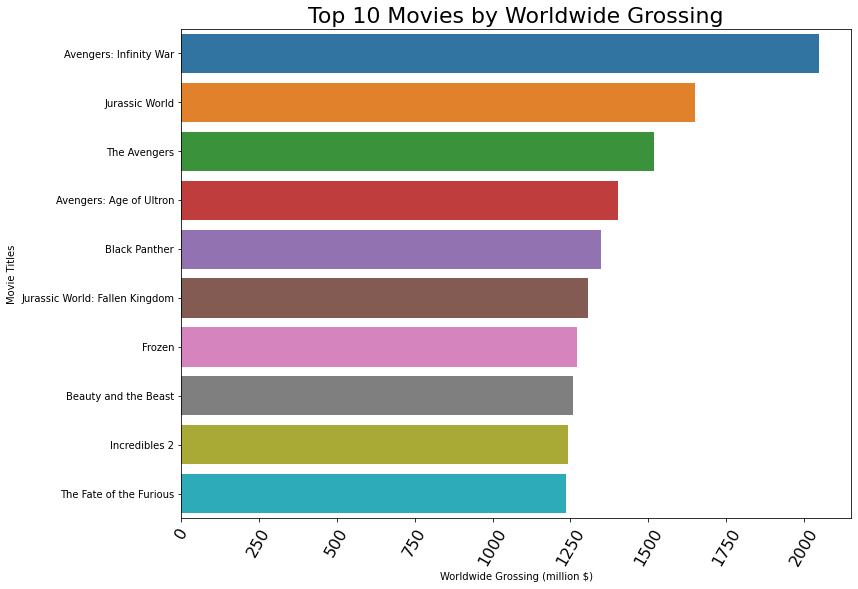

In [96]:
fig, ax = plt.subplots(figsize=(12,9))
sns.barplot(x=top_10_movies['worldwide_gross'], y=top_10_movies['original_title'])

plt.xticks(rotation = 60)
ax.set_xlabel('Top 10 grossing movies')

ax.set_xticklabels(('0','250', '500', '750', '1000', '1250', '1500', '1750', '2000'), fontsize = "16");

# seting the labels
plt.xlabel('Worldwide Grossing (million $)')
plt.ylabel('Movie Titles')
plt.title('Top 10 Movies by Worldwide Grossing', fontsize=22)
plt.show()
#check labels 

The above diagram shows the top 10 movies by worldwide grossing.
Avangers: Infinity War came out as the top grossing movie with worldwide revenue a little over 2 billion $. Then followed by Jurassic World as second with around 1.6 billion $, and finally on the third place The Avangers with the total grossing of 1.5 billion.
It worth to mention that there are two animation movies in the top 10 list, Frozen and the Incredibles 2, with a total gross of 1.25 billion $. This need to be taken into consideration when selecting the target audience, as movies targeted for kids make significant amount of revenue.

In [98]:
#profit per genres for the top 10 movies
top_10_movies_profit_by_genre =top_10_movies.groupby('genres').sum()['profit']
top_10_movies_profit_by_genre

genres
Action       8816216214
Animation    2164990621
Fantasy      1099199706
Name: profit, dtype: int64

/var/folders/0k/t_v9n_fd08b6ymg1f7lkdlb40000gn/T/ipykernel_34857/562431918.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(('0','2.0', '4.0', '6.0', '8.0'), fontsize = "16");


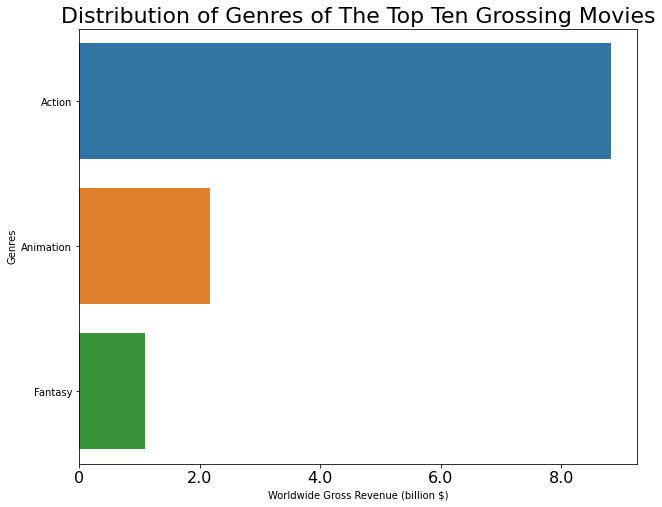

In [100]:
fig, ax = plt.subplots(figsize=(10,8))

sns.barplot(x= top_10_movies_profit_by_genre.values, y = top_10_movies_profit_by_genre.index, ax = ax)

ax.set_xticklabels(('0','2.0', '4.0', '6.0', '8.0'), fontsize = "16");

# seting the labels
plt.xlabel('Worldwide Gross Revenue (billion $)')
plt.ylabel('Genres')
plt.title('Distribution of Genres of The Top Ten Grossing Movies', fontsize=22)
plt.show()

In [102]:
# number of movies released between 2010 and 2019
num_movie_releases = imdb_all['year'].value_counts().sort_index(ascending = False).head(10)
num_movie_releases

2019     51
2018    148
2017    176
2016    216
2015    339
2014    245
2013    227
2012    221
2011    241
2010    203
Name: year, dtype: int64

In [103]:
#filtering to the movie data for films from 2010 to 2019
last_10_years = imdb_all[(imdb_all['year'] == 2019) | (imdb_all['year'] == 2018) | (imdb_all['year'] == 2017) |\
                         (imdb_all['year'] == 2016) | (imdb_all['year'] == 2015) | (imdb_all['year'] == 2014) | \
                         (imdb_all['year'] == 2013) | (imdb_all['year'] == 2012) | (imdb_all['year'] == 2011) | \
                         (imdb_all['year'] == 2010)]

In [151]:
last_10_years.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2518
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   level_0            2067 non-null   int64         
 1   index              2067 non-null   int64         
 2   movie_id           2067 non-null   object        
 3   original_title     2067 non-null   object        
 4   runtime_minutes    2067 non-null   float64       
 5   genres             2067 non-null   object        
 6   averagerating      2067 non-null   float64       
 7   numvotes           2067 non-null   int64         
 8   release_date       2067 non-null   datetime64[ns]
 9   production_budget  2067 non-null   int64         
 10  domestic_gross     2067 non-null   int64         
 11  worldwide_gross    2067 non-null   int64         
 12  foreign_gross      2067 non-null   int64         
 13  year               2067 non-null   int64         
 14  month   

In [104]:
# percentage of profitable films betweeen 2010 - 2019
last_10_years['profitable'].value_counts(normalize = True)*100

1    62.941461
0    37.058539
Name: profitable, dtype: float64

From all the movies between 2010 and 2019, 63 % of them were profitable, and almost 37% of them cost more money to make than the gross revenue the film earned.

In [105]:
# check if I need to delete this
#avg runtime for each genres
avg_runt = last_10_years.groupby('genres')['runtime_minutes'].mean()
avg_runt = avg_runt.round(2)
avg_runt

genres
Action         111.06
Adventure      108.83
Animation       93.81
Biography       93.81
Comedy          97.81
Crime          100.00
Documentary     80.46
Drama          109.20
Family          94.67
Fantasy        103.38
History         81.50
Horror          94.13
Music           93.00
Musical        105.00
Romance        103.82
Sci-Fi         100.29
Sport           99.43
Thriller        93.25
Western         84.00
Name: runtime_minutes, dtype: float64

In [106]:
ten_year_genre = last_10_years['genres'].value_counts()
ten_year_genre

Drama          808
Action         504
Horror         246
Animation      113
Comedy          89
Documentary     79
Romance         56
Adventure       47
Crime           40
Thriller        24
Biography       16
Fantasy         16
Sci-Fi          14
Sport            7
Family           3
History          2
Musical          1
Western          1
Music            1
Name: genres, dtype: int64

In [107]:
t = last_10_years.groupby(['profitable', 'genres'])['genres'].count()
#t = last_10_years.groupby('profitable')['genres'].apply(lambda x:100 * x / float(x.sum()))
t

profitable  genres     
0           Action         163
            Adventure       10
            Animation       16
            Biography       12
            Comedy          31
            Crime           15
            Documentary     31
            Drama          340
            Family           3
            Fantasy          3
            Horror         101
            Music            1
            Musical          1
            Romance         14
            Sci-Fi           6
            Sport            4
            Thriller        14
            Western          1
1           Action         341
            Adventure       37
            Animation       97
            Biography        4
            Comedy          58
            Crime           25
            Documentary     48
            Drama          468
            Fantasy         13
            History          2
            Horror         145
            Romance         42
            Sci-Fi           8
            Spo

In [108]:
#profitable dataframe
prof = last_10_years[last_10_years['profitable'] == 1]
prof_g = prof['genres'].value_counts()
#prof_g = prof_g .round(2)
prof_g

Drama          468
Action         341
Horror         145
Animation       97
Comedy          58
Documentary     48
Romance         42
Adventure       37
Crime           25
Fantasy         13
Thriller        10
Sci-Fi           8
Biography        4
Sport            3
History          2
Name: genres, dtype: int64

In [109]:
perc = (prof_g/ten_year_genre)*100
perc = perc.sort_values(ascending = False).round(2)
perc

History        100.00
Animation       85.84
Fantasy         81.25
Adventure       78.72
Romance         75.00
Action          67.66
Comedy          65.17
Crime           62.50
Documentary     60.76
Horror          58.94
Drama           57.92
Sci-Fi          57.14
Sport           42.86
Thriller        41.67
Biography       25.00
Family            NaN
Music             NaN
Musical           NaN
Western           NaN
Name: genres, dtype: float64

In [110]:
p = perc.to_frame()

/var/folders/0k/t_v9n_fd08b6ymg1f7lkdlb40000gn/T/ipykernel_34857/1875959264.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels((0,20,40,60,80,100),fontsize=18)


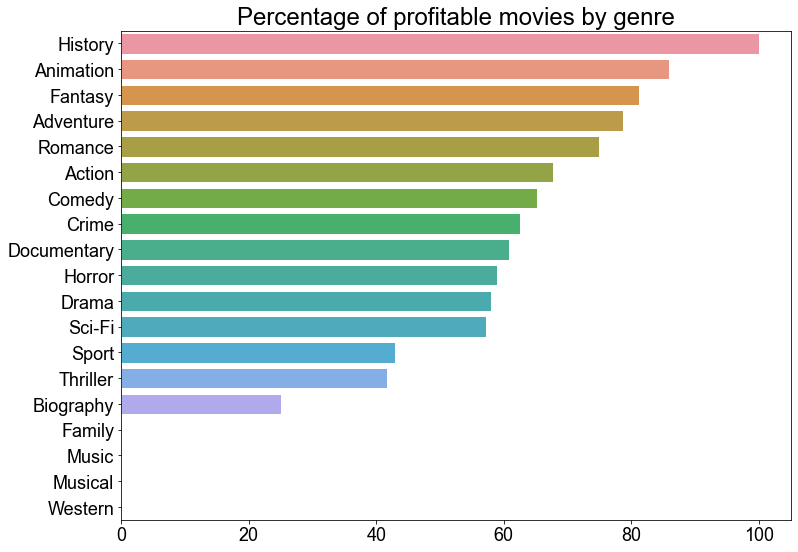

In [111]:
fig, ax = plt.subplots(figsize = (12,9))
y = list(p.index)
sns.set_color_codes("muted")
sns.set(font_scale=2)
b = sns.barplot(data= p, x = p['genres'], y=p.index, label='% of profitable movies')
ax.set(xlabel="", title = 'Percentage of profitable movies by genre')

sns.set(rc={'axes.facecolor':'d5dbf0', 'figure.facecolor':'white'})

ax.set_xticklabels((0,20,40,60,80,100),fontsize=18)
ax.set_yticklabels((y),fontsize=18)

plt.show()

In [112]:
#avg runtime for each genres for profitable movies between 2010 and 2019
avg_runt = prof.groupby('genres')['runtime_minutes'].mean()
a_runt = avg_runt.round(2)
a_runt.to_frame()

,runtime_minutes
genres,
Action,115.39
Adventure,110.24
Animation,94.79
Biography,89.75
Comedy,98.38
Crime,102.28
Documentary,77.81
Drama,111.96
Fantasy,105.15


In [139]:
#geting the avg runtime of a movie per genres
top_100_movies = top_movies.head(100)
avg_runtime_per_genres =top_100_movies.groupby('genres')['runtime_minutes'].mean()
avg_runtime_per_genres = avg_runtime_per_genres.sort_values(ascending= False)
avg_runtime_per_genres.round(2)

genres
Adventure    139.43
Action       133.00
Drama        123.78
Horror       116.50
Fantasy      115.75
Comedy       102.00
Animation     97.73
Sci-Fi        50.00
Name: runtime_minutes, dtype: float64

Based on the ordered data set for the first 100 top worldwide grossing movies: the optimal length for the 3 genres, previously seen in the the top 10 movies were around the following length: Action: 133 min , Animation: 97 min, Fantasy: 119 min. Which makes sense, the target audience for the animation movies are children, they attention span is less then the adult's, the 1.5h mark should be the maximum target length for movies in this genre.

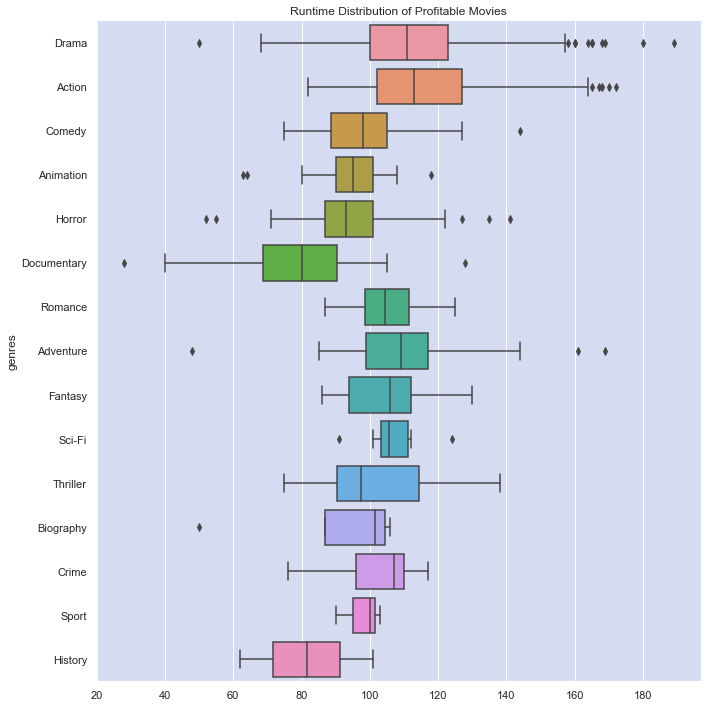

In [115]:
#fig, ax = plt.subplots(figsize = (14,11))

sns.catplot(data = prof, x='runtime_minutes', y='genres', kind='box', height =10)#,hue='profitable'))
#sns.set(rc={'figure.figsize':(11,8)})
plt.title('Runtime Distribution of Profitable Movies')
plt.xlabel("", fontsize = 16)
#plt.xticks("", fontsize = 16)
#plt.set_tick_params(which='minor', bottom=True)
plt.show()


Based on the most profitable genres, disregarding the History genre, as it only had 2 movies in the data set.
The average runtime for genre: Animation it is around 90-95 minutes, for Fantasy it is 105m , Adventure - 110 minutes, Romance is 105 minutes, Action is a bit less than 2 hours and Comedy has an average runtime of 98 minutes.

## Profit versus the average rating of movies

In [116]:
# ROI
roi = last_10_years.groupby('genres')['ROI'].mean()
roi = roi.round(2)
roi

genres
Action         156.93
Adventure      115.90
Animation      242.55
Biography      -22.89
Comedy         137.48
Crime           98.86
Documentary    190.08
Drama          194.83
Family        -100.00
Fantasy        371.64
History        163.04
Horror         703.11
Music          -49.54
Musical        -90.50
Romance        206.82
Sci-Fi         123.32
Sport          773.31
Thriller        68.83
Western        -84.97
Name: ROI, dtype: float64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/var/folders/0k/t_v9n_fd08b6ymg1f7lkdlb40000gn/T/ipykernel_34857/2794275175.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(('','-250', '0', '250','500','750','1000','1250','1500', '1750'), fontsize = "16");


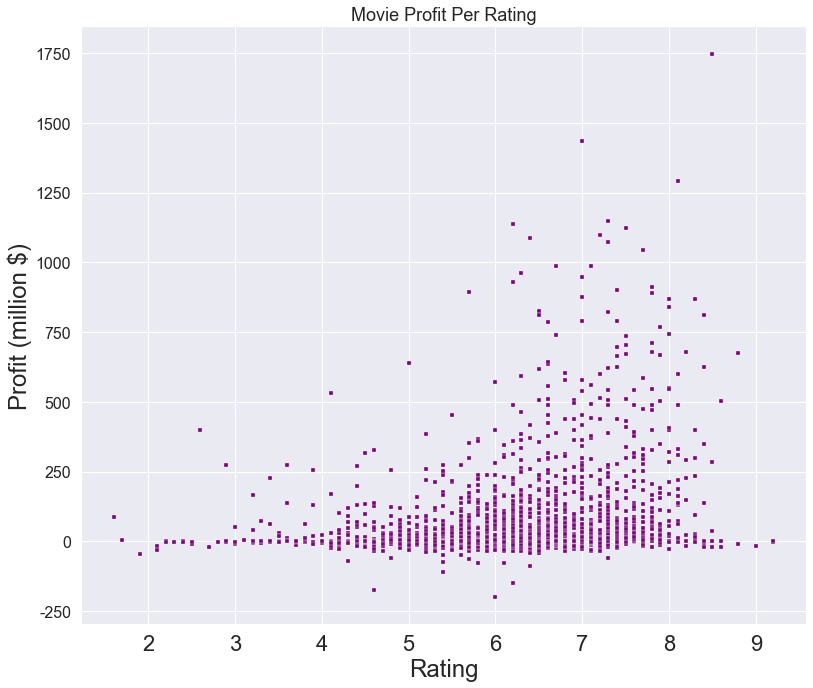

In [125]:
# 
fig, ax  = plt.subplots(figsize = (13,11))
sns.scatterplot(last_10_years['averagerating'], last_10_years['profit'], s= 16, marker='s', color = 'purple', ax = ax)

# seting the labels
plt.xlabel('Rating')
plt.ylabel('Profit (million $)')
plt.title('Movie Profit Per Rating', fontsize=18)

#plt.set_yticks()
ax.set_yticklabels(('','-250', '0', '250','500','750','1000','1250','1500', '1750'), fontsize = "16");

There is correlation between the avarage rating and the amount of profit the movies make.

In the below table you can find the average amount of initial investment needed for each genre to create a movie in it.

In [126]:
# AVG amount of investment needed for each genre
avg_investment =last_10_years.groupby('genres')['production_budget'].mean()
avg_investment.to_frame()


,production_budget
genres,
Action,6.894823e+07
Adventure,8.631277e+07
Animation,9.048230e+07
Biography,8.681711e+06
Comedy,2.592086e+07
Crime,2.484475e+07
Documentary,2.058358e+07
Drama,1.990394e+07
Family,2.416667e+06


Based on the available data, the average initial investment amount required for each of 19  genres found in the data set shown in million $:
    Action:    68.94 
    Adventure: 86.31 
    Animation: 90.48 
    Biography: 18.46 
    Comedy:    25.92
    Crime:     24.84
    Documentary: 20.58
    Drama:     19.89
    Family:    45.56
    Fantasy:   48.60
    History:   10.75
    Horror:    14.06
    Music:     18.00
    Musical:    5.60
    Romance:   22.08
    Sci-Fi:    35.71
    Sport:      8.67
    Thriller:  29.82
    Western     1.90

Total number of movies released categorised by month.

In [127]:
month = last_10_years['month'].value_counts()
month = month.sort_index()
month = month.to_frame()

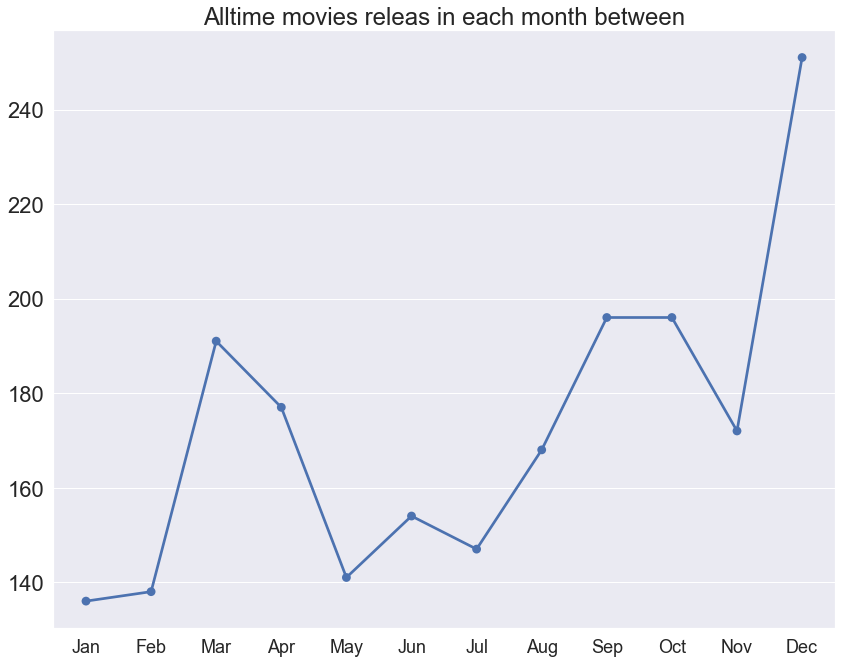

In [128]:
fig, ax = plt.subplots(figsize=(14,11))
sns.set_color_codes("pastel")
sns.set(font_scale=2)

sns.pointplot(data= p, x = month.index, y=month['month'], color='b', ax = ax)
ax.set(ylabel="", title = 'Alltime movies releas in each month between')
ax.set_xticklabels(('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul','Aug','Sep','Oct','Nov','Dec'), fontsize = 18)#, fontsize=)
plt.show()

The above graph shows that between 2010 and 2019 most of the movies were released in the following month: March, September, October, December. 
The least favoured month for movie realease is in the begining of the year, January and February.
    

In [131]:
# genres that made loss
loss = last_10_years[last_10_years['profitable'] == 0]

In [132]:
#profitable genres
genre_loss = loss['genres'].value_counts()
genre_loss

Drama          340
Action         163
Horror         101
Comedy          31
Documentary     31
Animation       16
Crime           15
Thriller        14
Romance         14
Biography       12
Adventure       10
Sci-Fi           6
Sport            4
Fantasy          3
Family           3
Musical          1
Western          1
Music            1
Name: genres, dtype: int64

In [135]:
last_10_years.groupby(["year","genres"])["ROI"].mean()

year  genres   
2010  Action       117.135833
      Adventure    152.197500
      Animation    214.822727
      Biography    -73.200000
      Comedy        78.677500
                      ...    
2019  Fantasy      249.560000
      Horror       351.687000
      Romance        9.280000
      Sci-Fi       -64.030000
      Thriller    -100.000000
Name: ROI, Length: 135, dtype: float64

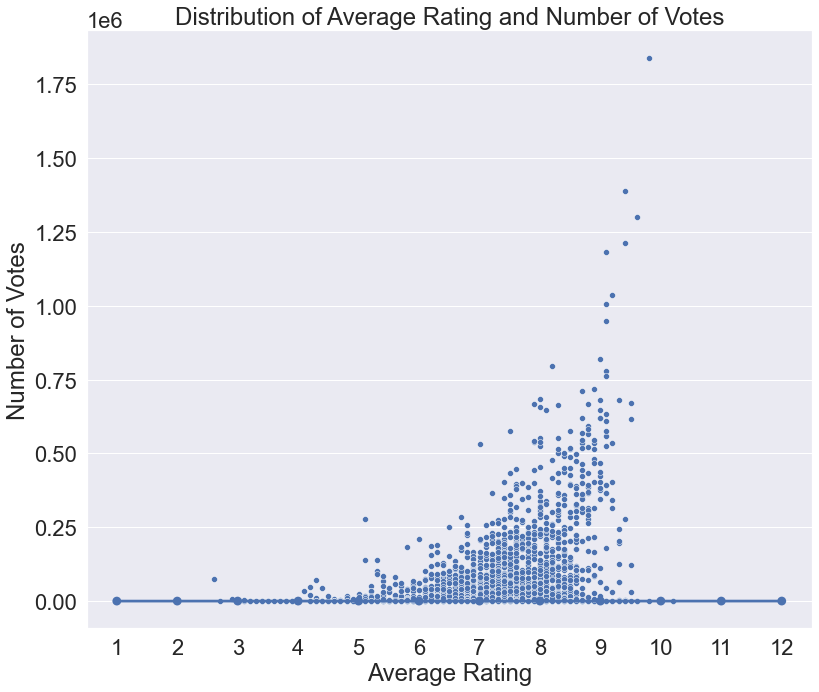

In [145]:
fig, ax = plt.subplots(figsize = (13,11))
sns.scatterplot(data = last_10_years, x= 'averagerating' , y= 'numvotes',  ax = ax)
sns.set_color_codes("pastel")
sns.set(font_scale=2)

sns.pointplot(data= p, x = month.index, y=month['month'], ax = ax)
ax.set(ylabel = "Number of Votes", xlabel = 'Average Rating', title = 'Distribution of Average Rating and Number of Votes')
plt.show()

If the rating was between 5 and 8, the likelyhood of a higher vote increases as the number of votes increases

### Next Steps

If I had more time I would expand the analysis to see how successful are the original movies or those which are based on book adaptations. 
Besids the box office revenue, lot of movies make extra revenue through merchandising and licencing. Looking at that information would might change the top 10 movies or their genre distribution. 
In addition to these check the actors / actresses in movies where the initial investment is on the lower side but the Return of Investment is high, might show some patterns for some A listers who attract more people into the theatres.

### Recommendations

Based on the analysis the following should be taken into consideration before entering the movie market:

Most profitable genres to make movies are : 
     - Action
     - Animation
     - Fantasy
     - Adventure
     - Romance

Optimal length for top genres:
    - Action movies is 133 mins 
    - Animation is around 95 mins
    - Fantasy - 119 mins 
    - Adventure - 139 mins
    - Romance - 110 mins

Best time to release a movie: 
    - March
    - September 
    - October 
    - December

Month to avoid release: 
    - January 
    - February 
    - May 
    - June
    - July

Based on the available data, the average initial investment amount required for all the genres, shown in million $: Action: 68.94 Adventure: 86.31 Animation: 90.48 Biography: 18.46 Comedy: 25.92 Crime: 24.84 Documentary: 20.58 Drama: 19.89 Family: 45.56 Fantasy: 48.60 History: 10.75 Horror: 14.06 Music: 18.00 Musical: 5.60 Romance: 22.08 Sci-Fi: 35.71 Sport: 8.67 Thriller: 29.82 Western 1.90


### Thank You!